In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [3]:
df = pd.read_csv("city_energy_consumption.csv")
df.head()


,Date,ZoneID,AvgTemperature,Humidity,SpecialEvent,EnergyConsumption
0,2025-01-01,Zone_1,20.99,58.62,0,270.05
1,2025-01-01,Zone_2,20.64,62.79,0,363.52
2,2025-01-01,Zone_3,19.06,65.43,0,378.47
3,2025-01-01,Zone_4,18.15,33.87,0,440.40
4,2025-01-01,Zone_5,17.97,63.14,0,471.43


In [4]:
df.shape


(1825, 6)

In [5]:
df.columns


Index(['Date', 'ZoneID', 'AvgTemperature', 'Humidity', 'SpecialEvent',
       'EnergyConsumption'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1825 non-null   object 
 1   ZoneID             1825 non-null   object 
 2   AvgTemperature     1825 non-null   float64
 3   Humidity           1825 non-null   float64
 4   SpecialEvent       1825 non-null   int64  
 5   EnergyConsumption  1825 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 85.7+ KB


In [7]:
df.describe()


,AvgTemperature,Humidity,SpecialEvent,EnergyConsumption
count,1825.000000,1825.000000,1825.000000,1825.000000
mean,20.026071,59.859523,0.100274,397.186893
std,7.342911,10.129597,0.300447,79.768672
min,3.930000,30.000000,0.000000,186.570000
25%,13.230000,53.130000,0.000000,332.800000
50%,20.150000,59.950000,0.000000,396.010000
75%,26.700000,66.870000,0.000000,461.100000
max,34.310000,90.000000,1.000000,614.560000


In [8]:
df["Date"] = pd.to_datetime(df["Date"])


In [9]:
df["Month"] = df["Date"].dt.month
df.head()


,Date,ZoneID,AvgTemperature,Humidity,SpecialEvent,EnergyConsumption,Month
0,2025-01-01,Zone_1,20.99,58.62,0,270.05,1
1,2025-01-01,Zone_2,20.64,62.79,0,363.52,1
2,2025-01-01,Zone_3,19.06,65.43,0,378.47,1
3,2025-01-01,Zone_4,18.15,33.87,0,440.40,1
4,2025-01-01,Zone_5,17.97,63.14,0,471.43,1


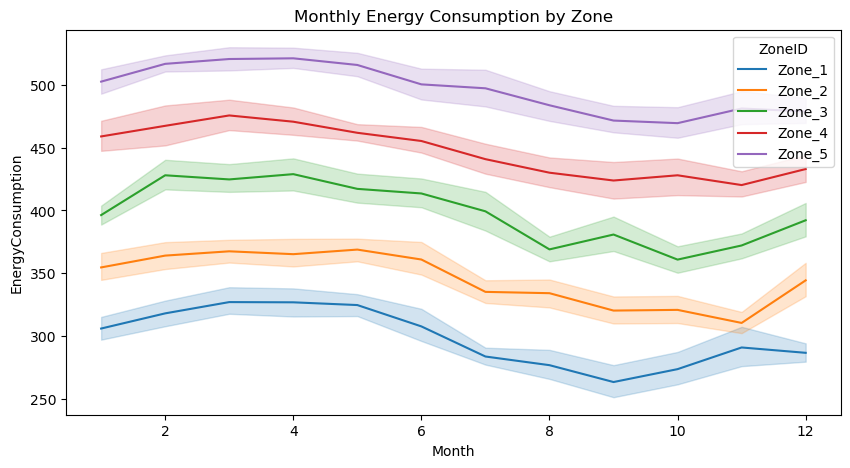

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Month", y="EnergyConsumption", hue="ZoneID")
plt.title("Monthly Energy Consumption by Zone")
plt.show()


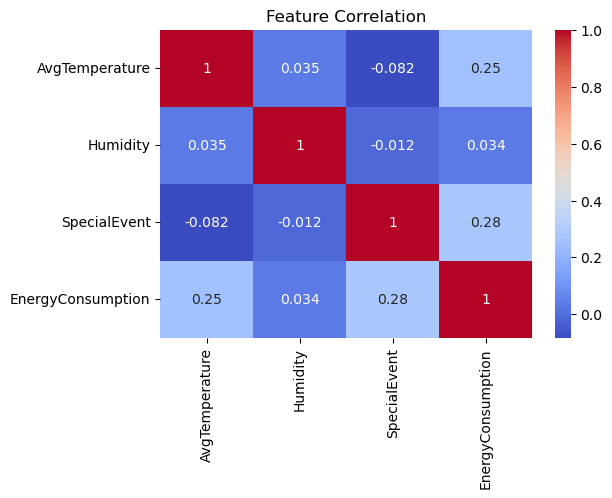

In [11]:
corr = df[
    ["AvgTemperature", "Humidity", "SpecialEvent", "EnergyConsumption"]
].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


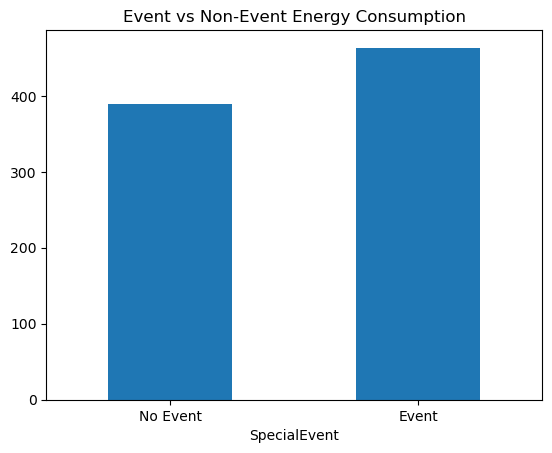

In [12]:
df.groupby("SpecialEvent")["EnergyConsumption"].mean().plot(
    kind="bar", title="Event vs Non-Event Energy Consumption"
)
plt.xticks([0,1], ["No Event", "Event"], rotation=0)
plt.show()


In [13]:
X = df[["ZoneID", "AvgTemperature", "Humidity", "SpecialEvent"]]
y = df["EnergyConsumption"]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
df["ZoneID"].unique()


array(['Zone_1', 'Zone_2', 'Zone_3', 'Zone_4', 'Zone_5'], dtype=object)

In [17]:
['Zone_1', 'Zone_2', 'Zone_3', 'Zone_4', 'Zone_5']


['Zone_1', 'Zone_2', 'Zone_3', 'Zone_4', 'Zone_5']

In [18]:
df["ZoneID"] = df["ZoneID"].str.extract('(\d+)').astype(int)


In [19]:
df.head()


,Date,ZoneID,AvgTemperature,Humidity,SpecialEvent,EnergyConsumption,Month
0,2025-01-01,1,20.99,58.62,0,270.05,1
1,2025-01-01,2,20.64,62.79,0,363.52,1
2,2025-01-01,3,19.06,65.43,0,378.47,1
3,2025-01-01,4,18.15,33.87,0,440.40,1
4,2025-01-01,5,17.97,63.14,0,471.43,1


In [20]:
X = df[["ZoneID", "AvgTemperature", "Humidity", "SpecialEvent"]]
y = df["EnergyConsumption"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 16.193263049741468


In [26]:
def predict_energy():
    zone = int(input("Zone ID (1–5): "))
    temp = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    event = int(input("Event (0/1): "))

    input_df = pd.DataFrame(
        [[zone, temp, humidity, event]],
        columns=["ZoneID", "AvgTemperature", "Humidity", "SpecialEvent"]
    )

    prediction = model.predict(input_df)
    print(f"Predicted Energy Consumption: {prediction[0]:.2f} kWh")

predict_energy()


Zone ID (1–5):  1
Temperature (°C):  25
Humidity (%):  60
Event (0/1):  0


Predicted Energy Consumption: 304.46 kWh
